# Predicting Hospital Readmissions: EDA

## Introduction

Predictive modeling plays a crucial role in healthcare analytics, providing insights into patient outcomes and allowing for proactive interventions. In this Jupyter Notebook, we delve into the Exploratory Data Analysis (EDA) phase of a predictive modeling project, focusing on patient readmission rates.


## Background


Hospital readmissions pose significant challenges for healthcare providers and contribute to increased healthcare costs. Understanding the factors influencing readmission rates can lead to the development of predictive models that aid in identifying high-risk patients and implementing targeted interventions.


## Objective


The primary objective of this analysis is to perform a comprehensive EDA on the dataset related to patient admissions and readmissions. Through visualizations, statistical summaries, and data exploration techniques, we aim to:

I aim to meet these three objectives:

- Investigating and identifying specific patient profiles or demographics that are more prone to hospital readmissions.
    - Are there particular age groups that exhibit higher rates of readmission?
    - Can we identify patterns in readmissions based on the number of previous hospitalizations?

- Examining the impact of medication adherence on hospital readmission rates.
    - Does adherence to prescribed medications correlate with lower readmission rates?
    - How does the frequency of outpatient visits relate to medication adherence and subsequent readmissions?
    - Exploring the Impact of Multimorbidity on Readmissions:

- Investigating the relationship between the number of diagnoses (multimorbidity) and hospital readmission rates.
    - Do patients with multiple diagnoses (multimorbidity) experience higher or lower rates of readmission?
    - Are there specific combinations of diagnoses that contribute significantly to increased readmission risk?
    - How does the presence of comorbid conditions influence the likelihood of readmission?


## Dataset


The dataset used for this analysis contains anonymized patient records, including age demographic information, medical history, admission details, and readmission status. 

## Tools and Libraries
We will leverage popular Python libraries, including NumPy, Pandas, Matplotlib, and Seaborn, to conduct our EDA. These tools provide a robust environment for data manipulation, visualization, and statistical analysis.

Now, let's dive into the data and begin our exploration!

### Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Import CSV file

In [79]:
df = pd.read_csv('hospital_readmissions.csv')

### Data Cleaning

In [80]:
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


Information in the file

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

The target variable of this dataset is "readmitted"


In [6]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [7]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [11]:
df.set_index('age', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, [70-80) to [50-60)
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time_in_hospital   25000 non-null  int64 
 1   n_lab_procedures   25000 non-null  int64 
 2   n_procedures       25000 non-null  int64 
 3   n_medications      25000 non-null  int64 
 4   n_outpatient       25000 non-null  int64 
 5   n_inpatient        25000 non-null  int64 
 6   n_emergency        25000 non-null  int64 
 7   medical_specialty  25000 non-null  object
 8   diag_1             25000 non-null  object
 9   diag_2             25000 non-null  object
 10  diag_3             25000 non-null  object
 11  glucose_test       25000 non-null  object
 12  A1Ctest            25000 non-null  object
 13  change             25000 non-null  object
 14  diabetes_med       25000 non-null  object
 15  readmitted         25000 non-null  object
dtypes: int64(7), object(9)
memory usage: 

No missing variables detected, no action needed.

In [23]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,24420.000000,24967.000000,23773.000000,24156.000000,20859.0,23372.000000,22272.0
mean,4.238821,43.163936,1.112481,15.382928,0.0,0.374123,0.0
std,2.689535,19.717979,1.386081,6.548053,0.0,0.630500,0.0
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0
25%,2.000000,31.000000,0.000000,11.000000,0.0,0.000000,0.0
50%,4.000000,44.000000,1.000000,15.000000,0.0,0.000000,0.0
75%,6.000000,57.000000,2.000000,20.000000,0.0,1.000000,0.0
max,12.000000,96.000000,5.000000,33.000000,0.0,2.000000,0.0


Changing age range to categorical data:

In [74]:
#Check unique 
df['age'].unique()

array(['senior-old age', 'late-middle age', 'mid-old age',
       'early-middle age', 'very senior-old', '[90-100)'], dtype=object)

In [81]:
df['cate_age'] = df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old'
                                           ,'[90-100)':'centenarians'})


In [82]:
df[['age', 'cate_age']]

,age,cate_age
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


Drop 'age' as a label

In [ ]:
df.drop('age', axis=1, inplace=True)

In [88]:
df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'}
                       ,inplace=True)
df.head

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,cate_age
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age


Convert data type to categorical:

In [89]:
convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test',
            'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']
df[convert] = df[convert].astype('category')
df.dtypes

time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
cate_age                 object
dtype: object

Checking for inconsistent data:

In [91]:
for col in df.columns:
    print(col)
    print('\n', df[col].unique())

time_in_hospital

 [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures

 [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures

 [1 2 0 6 3 5 4]
n_medications

 [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient

 [ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient

 [ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n_emergency

 [ 0  1 10  2  3  4  5  7  6 12  8 16 28 18 11  9 

### Initial Data Analysis:

Describe each categorical column

In [93]:
df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,cate_age
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


Describe each quantitative column

In [97]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


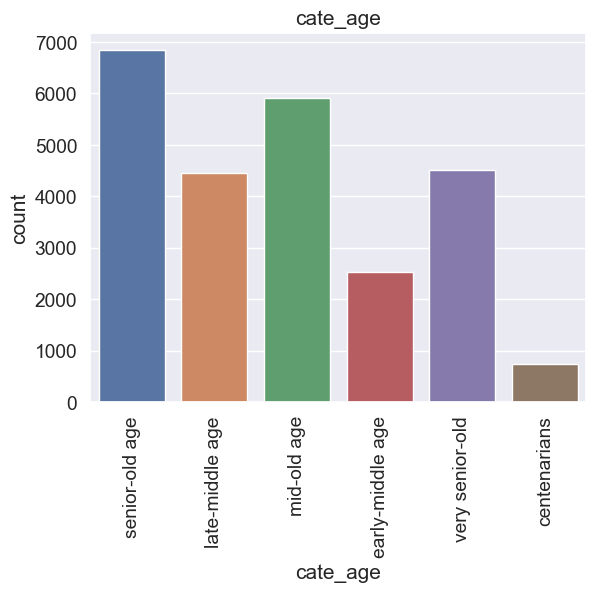

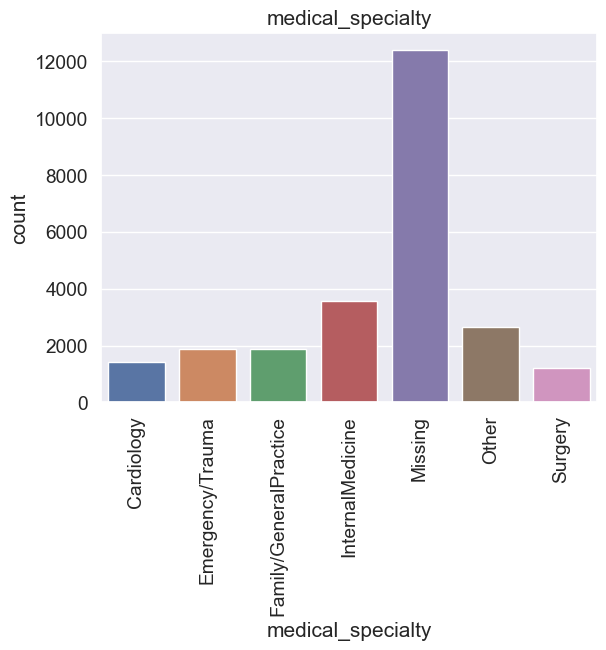

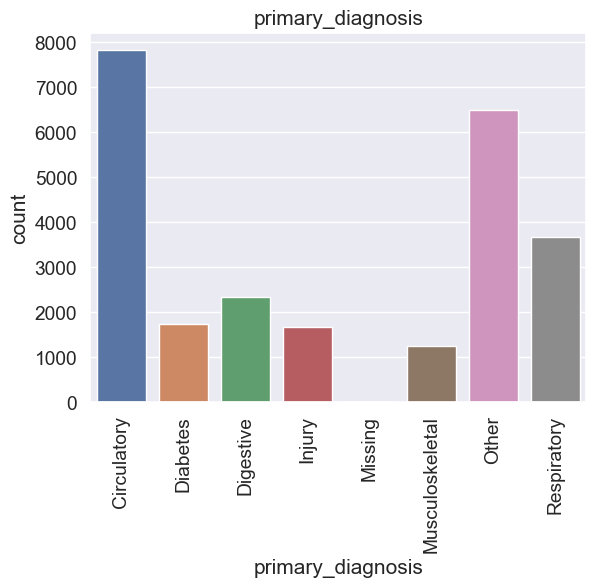

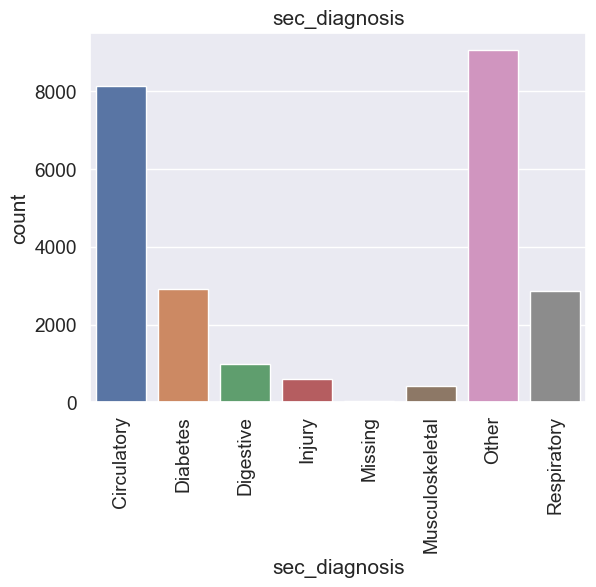

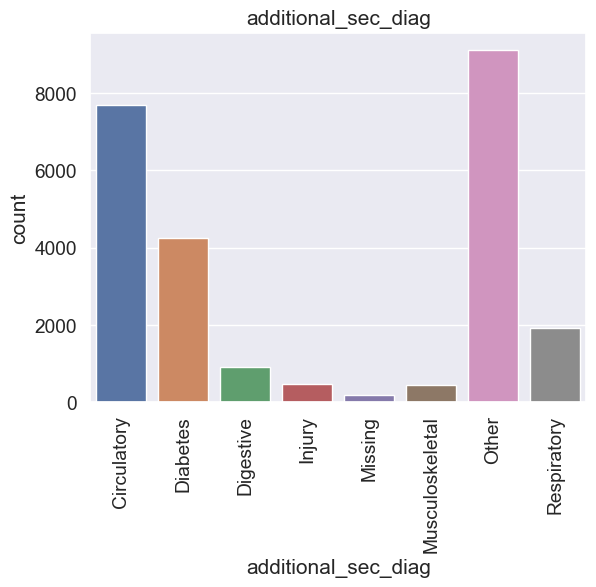

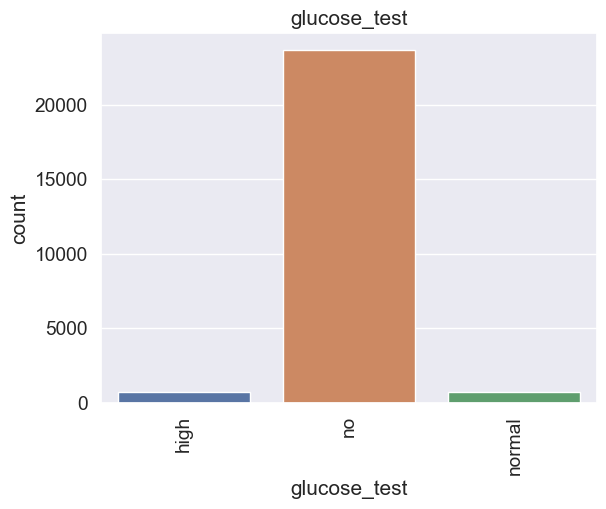

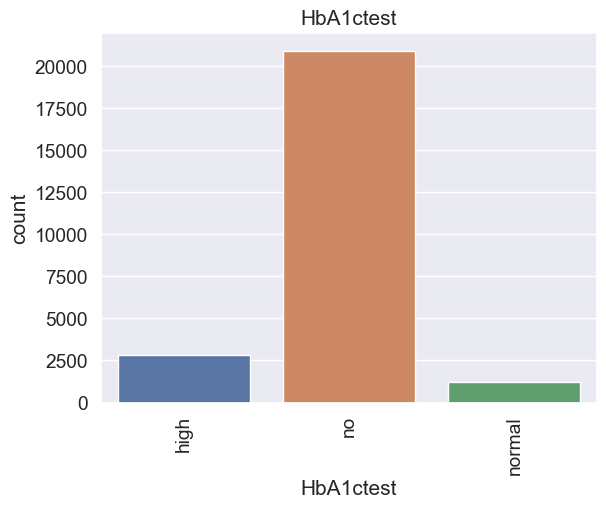

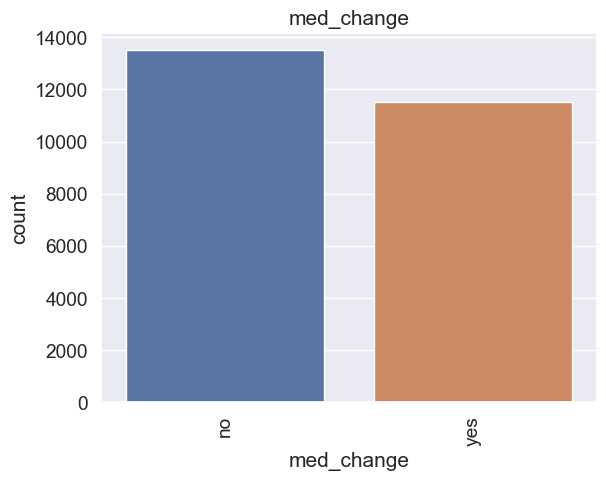

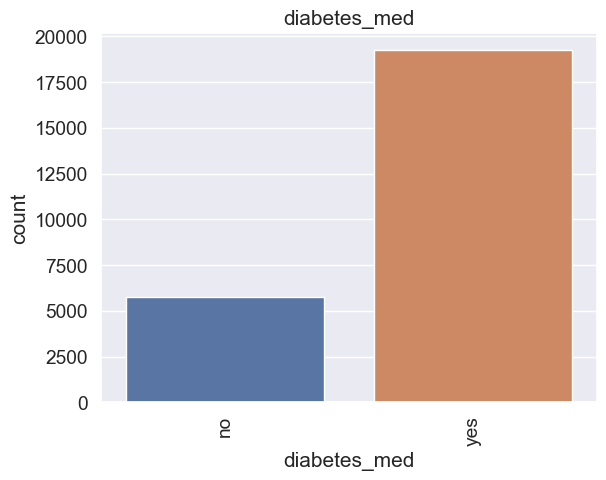

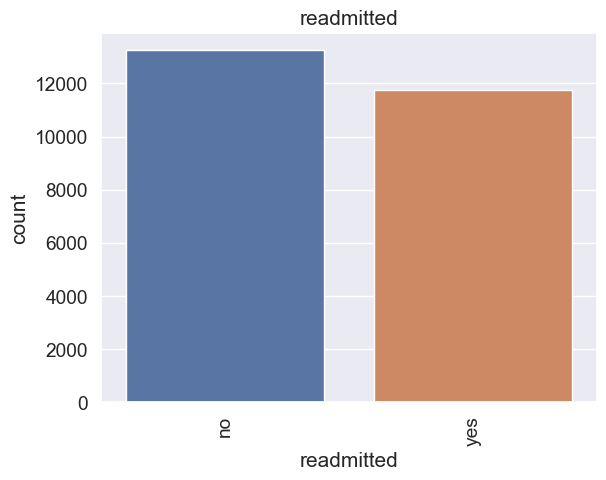

In [110]:
cols = ['cate_age', 'medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest'
           ,'med_change','diabetes_med','readmitted']


sns.set(style="darkgrid", font_scale=1.25)
def plot_cat_count():
    for c in cols:
        sns.countplot(x=c, data=df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

#### Investigating and identifying specific patient profiles or demographics that are more prone to hospital readmissions.

Are there particular age groups that exhibit higher rates of readmission?

<Figure size 1200x600 with 0 Axes>

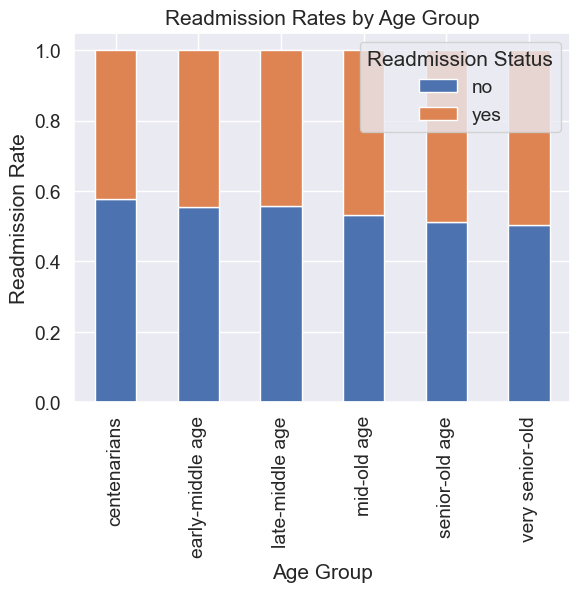

In [113]:
# Calculate readmission rates by age group
readmission_rates = df.groupby(['cate_age', 'readmitted']).size() / df.groupby('cate_age').size()
readmission_rates = readmission_rates.unstack()

# Create a bar plot for readmission rates
plt.figure(figsize=(12, 6))
readmission_rates.plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.legend(title='Readmission Status', loc='upper right')
plt.show()


Using Pie Chart:

/var/folders/12/9kkk6tqs47d4103npslj25_40000gn/T/ipykernel_67118/361967304.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df['readmitted'].groupby(df['cate_age']).value_counts().unstack().plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, ax=ax)


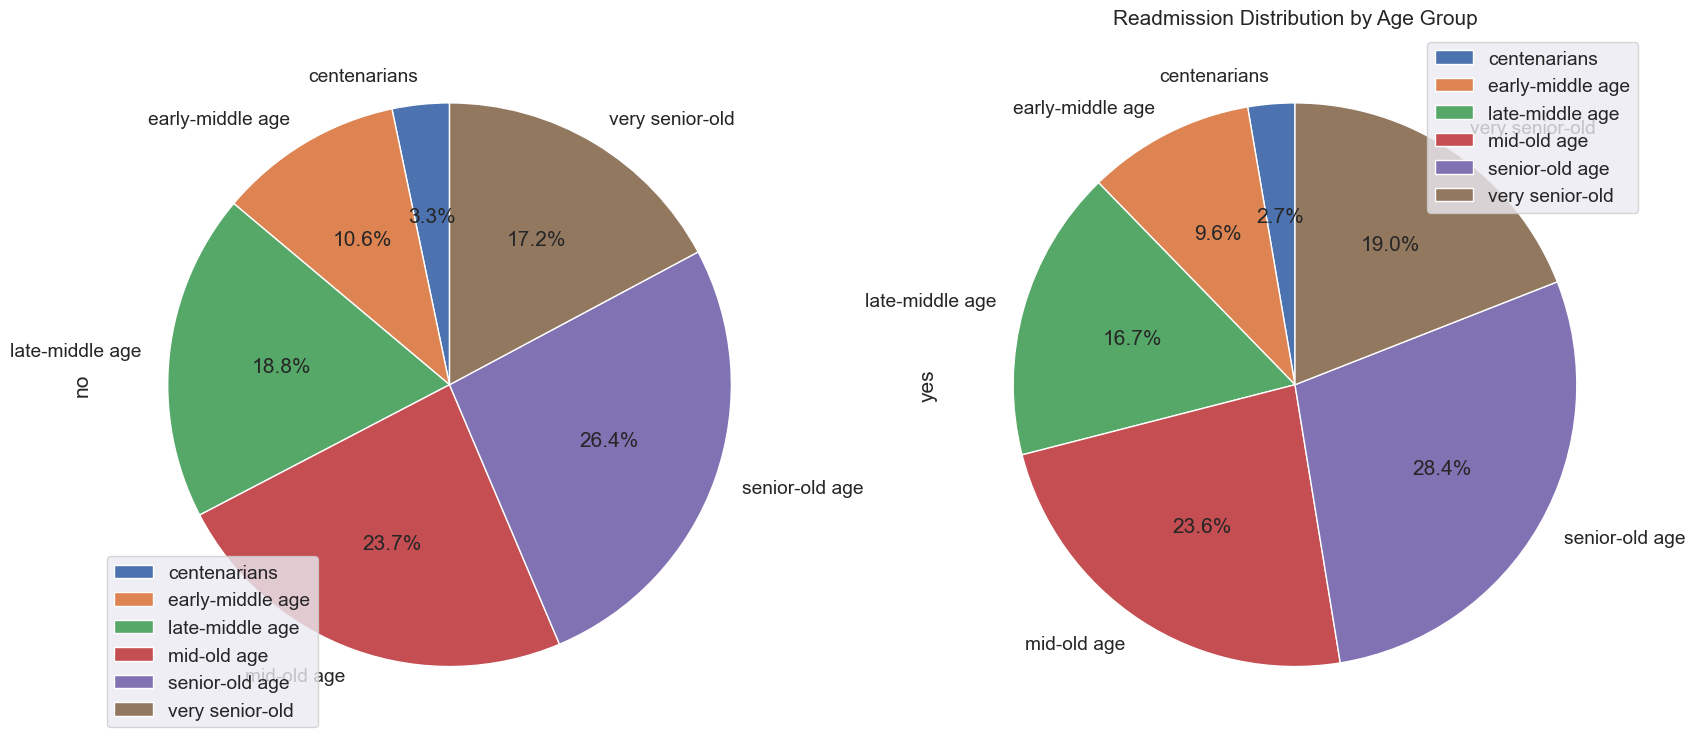

In [130]:
fig, ax = plt.subplots(figsize=(20, 20))

df['readmitted'].groupby(df['cate_age']).value_counts().unstack().plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, ax=ax)
plt.title('Readmission Distribution by Age Group')


plt.show()
